In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
# resolve all imports
import numpy as np
import matplotlib.pyplot as plt

from NeuralNetwork import NeuralNetwork
from activations import *
from optimization_functions import *
from cost_functions import *
from load import *

np.random.seed(1)

# Bird Classification Dataset

In [3]:
train_x_orig, train_y, test_x_orig, test_y, classes = load_birds()

y = 0. It's a non-cat picture.


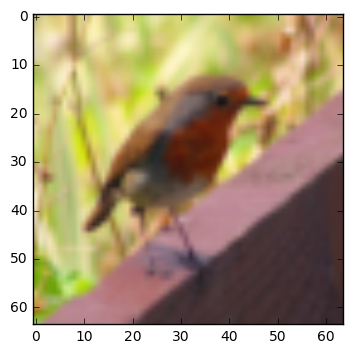

In [4]:
index = 10
plt.imshow(train_x_orig[index])
print ("y = " + str(train_y[0,index]) + ". It's a " + classes[train_y[0,index]].decode("utf-8")+  " picture.")

In [5]:
# Explore your dataset 
m_train = train_x_orig.shape[0]
num_px = train_x_orig.shape[1]
m_test = test_x_orig.shape[0]

print ("Number of training examples: " + str(m_train))
print ("Number of testing examples: " + str(m_test))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_x_orig shape: " + str(train_x_orig.shape))
print ("train_y shape: " + str(train_y.shape))
print ("test_x_orig shape: " + str(test_x_orig.shape))
print ("test_y shape: " + str(test_y.shape))

Number of training examples: 209
Number of testing examples: 50
Each image is of size: (64, 64, 3)
train_x_orig shape: (209, 64, 64, 3)
train_y shape: (1, 209)
test_x_orig shape: (50, 64, 64, 3)
test_y shape: (1, 50)


In [6]:
# Reshape the training and test examples 
train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1).T   # The "-1" makes reshape flatten the remaining dimensions
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T

# Standardize data to have feature values between 0 and 1.
train_x = train_x_flatten/255.
test_x = test_x_flatten/255.

print ("train_x's shape: " + str(train_x.shape))
print ("test_x's shape: " + str(test_x.shape))

train_x's shape: (12288, 209)
test_x's shape: (12288, 50)


In [7]:
layers_dims = [12288, 20, 7, 5, 1] #  5-layer model
hyperparameters = {
    "layers_dims":layers_dims,
    "init_method":"Xavier",
    "optimization_function":GradientDescent,
    "activation_funcs":[relu, relu, relu, sigmoid],
    "cost_func":Cross_Entropy_Loss,
    "reg_type":L2_Regularization,
    "reg_lambd":0.0,
    "learning_rate": 0.0075,
    "keep_probs":[1.0,1.0,1.0]
#     "keep_probs": [0.5, 0.5, 0.5],  
}
nn = NeuralNetwork(**hyperparameters)

In [15]:
from processing.vector_transform import *
theta, keys = dictionary_to_vector(nn.parameters)
print(theta.shape)
print(keys)

(245973, 1)
{'b1': (20, 1), 'b4': (1, 1), 'W4': (1, 5), 'W2': (7, 20), 'b3': (5, 1), 'W1': (20, 12288), 'W3': (5, 7), 'b2': (7, 1)}


In [16]:
parameters = vector_to_dictionary(theta, keys)
for key in parameters:
    print(key, parameters[key].shape)

b1 (20, 1)
b4 (1, 1)
W4 (1, 5)
W2 (7, 20)
b3 (5, 1)
W1 (20, 12288)
W3 (5, 7)
b2 (7, 1)


In [8]:
nn.Fit(train_x, train_y, num_iterations=2500, mini_batch_size=64, print_cost=True)

Cost after iteration 0: 0.692755


KeyboardInterrupt: 

In [111]:
pred_train, score = nn.Score(train_x, train_y, print_accuracy=True)
pred_test, score = nn.Score(test_x, test_y, print_accuracy=True)

Accuracy: 0.995215311005
Accuracy: 0.86


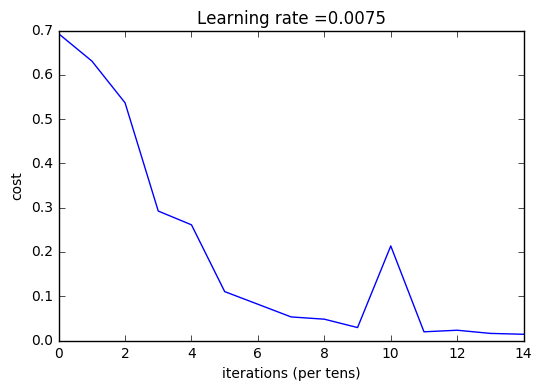

In [112]:
nn.Graph_Costs_Over_Time()

In [119]:
from layers import *
def linear_activation_backward_test_case():
    aL, linear_activation_cache = (np.array([[ 3.1980455 ,  7.85763489]]), ((np.array([[-1.02387576,  1.12397796], [-1.62328545,  0.64667545], [-1.74314104, -0.59664964]]), np.array([[ 0.74505627,  1.97611078, -1.24412333]]), 5), np.array([[ 3.1980455 ,  7.85763489]])))
    return aL, linear_activation_cache

def linear_act_backwards(dA, cache, activation, reg_function):
    linear_cache, activation_cache = cache
    dZ = dA * activation(activation_cache, derivative=True)
    dA_prev, dW, db = linear_backward(dZ, linear_cache, reg_function)
    return dA_prev, dW, db
    
reg_func = L2_Regularization(0.0)
AL, linear_activation_cache = linear_activation_backward_test_case()
dA_prev, dW, db = linear_act_backwards(AL, linear_activation_cache, relu, reg_func)
print(str(dA_prev))
print(str(dW))
print(str(db))

[[  2.38272385   5.85438014]
 [  6.31969219  15.52755701]
 [ -3.97876302  -9.77586689]]
[[ 2.77870358 -0.05500058 -5.13144969]]
[[ 5.52784019]]


# Planar Dataset 

In [114]:
def load_planar_dataset():
    np.random.seed(1)
    m = 400 # number of examples
    N = int(m/2) # number of points per class
    D = 2 # dimensionality
    X = np.zeros((m,D)) # data matrix where each row is a single example
    Y = np.zeros((m,1), dtype='uint8') # labels vector (0 for red, 1 for blue)
    a = 4 # maximum ray of the flower

    for j in range(2):
        ix = range(N*j,N*(j+1))
        t = np.linspace(j*3.12,(j+1)*3.12,N) + np.random.randn(N)*0.2 # theta
        r = a*np.sin(4*t) + np.random.randn(N)*0.2 # radius
        X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
        Y[ix] = j
        
    X = X.T
    Y = Y.T

    return X, Y

X, Y = load_planar_dataset()
print(X.shape)
print(Y.shape)

(2, 400)
(1, 400)


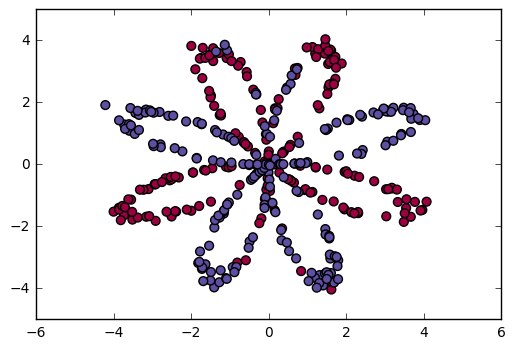

In [115]:
# Visualize the data:
plt.scatter(X[0, :], X[1, :], c=Y, s=40, cmap=plt.cm.Spectral);

In [116]:
layers_dims = [2, 4, 1]
hyperparameters = {
    "layers_dims":layers_dims,
    "init_method":"Xavier",
    "optimization_function":GradientDescent,
    "activation_funcs":[tanh, sigmoid],
    "cost_func":Cross_Entropy_Loss,
    "reg_type":L2_Regularization,
    "reg_lambd":0.0,
    "learning_rate": 1.2,
    "keep_probs":[1.0,1.0,1.0],
#     "keep_probs": [0.5, 0.5, 0.5],  
}
planar_nn = NeuralNetwork(**hyperparameters)

In [117]:
planar_nn.Fit(X, Y, num_iterations=10000, mini_batch_size = X.shape[1], print_cost=True)

Cost after iteration 0: 0.762527
Cost after iteration 100: 0.486482
Cost after iteration 200: 0.467208
Cost after iteration 300: 0.457853
Cost after iteration 400: 0.452035
Cost after iteration 500: 0.447897
Cost after iteration 600: 0.444708
Cost after iteration 700: 0.442114
Cost after iteration 800: 0.439919
Cost after iteration 900: 0.437998
Cost after iteration 1000: 0.436252
Cost after iteration 1100: 0.434559
Cost after iteration 1200: 0.432529
Cost after iteration 1300: 0.293549
Cost after iteration 1400: 0.271243
Cost after iteration 1500: 0.262677
Cost after iteration 1600: 0.257298
Cost after iteration 1700: 0.253490
Cost after iteration 1800: 0.250583
Cost after iteration 1900: 0.248242
Cost after iteration 2000: 0.246278
Cost after iteration 2100: 0.244581
Cost after iteration 2200: 0.243080
Cost after iteration 2300: 0.241730
Cost after iteration 2400: 0.240500
Cost after iteration 2500: 0.239366
Cost after iteration 2600: 0.238313
Cost after iteration 2700: 0.237328
Cost

In [118]:
pred_train, score = planar_nn.Score(X, Y, print_accuracy=True)

Accuracy: 0.91


# MNIST Dataset

# TODO List and Features to Implement

- ~~Change db from scalar to vector of (layer size, 1)~~
- Activation Functions:
    - Softmax and derivative
    - ~~Tanh and derivative~~
    - ~~make passing in activation functions functional~~
    - ~~Pass activation functions into the cache to make it easily retrievable~~
    - Remove dA from the calculations of derivatives.  Make custom implementations easier.
        - Only need Z and derivative(bool) as parameters.  Move dA into backprop
- Optimization Functions:
    - Base Optimization
        - ~~Minibatch~~
        - Learning Rate Decay
    - ~~Gradient Descent~~
    - Classic Momentum
    - Nesterov Momentum
    - RMSProp
    - Adam
- Gradient Checks
- ~~Dropout layers~~
- Batch-Normalization
- Preprocessing Functions

# Bugs
- Dropout
    - Bug concerning numerical stability.  Sigmoid will output 1.0 only without dropout turned on.
    - Tried using a "stable" sigmoid, bug persisting.

